## Load data

In [6]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

pd.set_option("display.max_columns", None)

# Seaborn config
sns.set_context("paper")
sns.set_theme(
    style=None,
    palette="gray",
    rc={"axes.labelsize": 14, "axes.labelweight": "bold"},
)

In [7]:
# Load Data
data_ambulatorio = pd.read_csv("data/DatabaseMoCA1.csv")
data_domiciliario = pd.read_csv("data/DatabaseMoCA2.csv")

data = pd.concat([data_ambulatorio, data_domiciliario])
data.dropna(
    subset=["Edad", "Anos de estudios", "Investigador/a"], inplace=True
)


def map_age_group(age_value):
    if 60 <= age_value <= 64:
        return "60-64"
    elif 65 <= age_value <= 69:
        return "65-69"
    elif 70 <= age_value <= 74:
        return "70-74"
    elif 75 <= age_value <= 79:
        return "75-79"
    elif 80 <= age_value:
        return "80+"
    else:
        return None


def map_education_group(education_value):
    if 0 <= education_value <= 6:
        return "Básica (0-6 años)"
    elif 7 <= education_value <= 11:
        return "Secundaria (7-11 años)"
    elif 12 <= education_value:
        return "Superior (12+ años)"
    else:
        return None


data["Rango de edad"] = data["Edad"].apply(map_age_group)
data.dropna(subset=["Rango de edad"], inplace=True)
data["Rango de nivel educativo"] = data["Anos de estudios"].apply(
    map_education_group
)

# Exclude participants: auditory or visual impairments, psychiatric diagnoses, concurrent cerebrovascular pathologies, mental retardation, traumatic brain injuries, and substance abuse disorders
drop_values = [
    "ALZHEIMER",
    "DEGENERATIV",
    "SORDEZ",
    "DEMENCIA",
    "NEUROPATÍA",
    "CATARATAS",
    "CEGUERA",
    "PERDIDA DE VISIÓN",
    "PARKINSON",
    "HIPOACUSIA",
    "DEGENERACION AUDITIVA",
    "MENIERE",
]
data = data[~data.Diagnóstico.str.contains("|".join(drop_values))]

# Date cut
data["Fecha"] = pd.to_datetime(data["Fecha"], dayfirst=True, format="mixed")
data = data.query("Fecha < '2024-05-31'")
data

,Edad,Fecha de nacimiento,Anos de estudios,Sexo,Fecha,VISUOESPACIAL / EJECUTIVA /5,IDENTIFICACIÓN /3,ATENCIÓN /6,LENGUAJE /3,ABSTRACCIÓN /2,RECUERDO DIFERIDO /5,ORIENTACIÓN /6,MIS /15,TOTAL /30,Investigador/a,Diagnóstico,Ambulatorio o domiciliario,Clinica de referencia,Nivel de estudios,Unnamed: 19,Rango de edad,Rango de nivel educativo
0,63.0,29/03/1960,11,F,2023-12-13,3,2,2,1,1,0,6,4,15,LUCIA BULGARELLI,Faltante,AMBULATORIO,Policlino San José-Barranco,NaN,NaN,60-64,Secundaria (7-11 años)
1,71.0,21/01/1952,16,F,2023-12-13,4,2,6,3,2,3,6,13,26,LUCIA BULGARELLI,Faltante,AMBULATORIO,Policlino San José-Barranco,NaN,NaN,70-74,Superior (12+ años)
2,67.0,08/02/1947,6,F,2024-01-09,0,2,5,1,0,0,6,4,14,LUCIA BULGARELLI,Faltante,AMBULATORIO,Policlino San José-Barranco,NaN,NaN,65-69,Básica (0-6 años)
3,77.0,28/05/1948,6,F,2024-01-18,1,2,1,0,0,0,5,1,9,LUCIA BULGARELLI,Faltante,AMBULATORIO,Policlino San José-Barranco,NaN,NaN,75-79,Básica (0-6 años)
4,82.0,19/09/1941,6,M,2024-01-18,2,3,5,1,0,0,6,2,17,LUCIA BULGARELLI,Faltante,AMBULATORIO,Policlino San José-Barranco,NaN,NaN,80+,Básica (0-6 años)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,65.0,10/09/1958,11,M,2024-05-25,3,3,4,2,0,4,5,13,21,LUCIA BULGARELLI,Faltante,AMBULATORIO,Municipalidad San Miguel,SECUNDARIA,NaN,65-69,Secundaria (7-11 años)
200,66.0,24/04/1958,17,M,2024-05-25,4,3,6,3,2,4,6,13,28,LUCIA BULGARELLI,Faltante,AMBULATORIO,Municipalidad San Miguel,SUPERIOR,NaN,65-69,Superior (12+ años)
201,70.0,24/04/1954,11,F,2024-05-25,2,3,3,2,1,3,5,11,19,LUCIA BULGARELLI,Faltante,AMBULATORIO,Municipalidad San Miguel,SECUNDARIA,NaN,70-74,Secundaria (7-11 años)
202,67.0,06/07/1956,11,F,2024-05-25,4,3,5,0,2,0,6,6,20,LUCIA BULGARELLI,Faltante,AMBULATORIO,Municipalidad San Miguel,SECUNDARIA,NaN,65-69,Secundaria (7-11 años)


In [8]:
data["Diagnóstico"].value_counts()

Diagnóstico
Faltante                                    235
NO PRESENTA ENFERMEDAD                       11
HIPERTENSIÓN                                 10
DIABETES                                      6
SIN ENFERMEDAD APARENTE                       5
                                           ... 
DERRAME CEREBRAL                              1
NO PRESENTA ENFEREMEDAD                       1
MIGRANIA                                      1
PURPURA SENIL, ACCIDENTE CEREBROVASCULAR      1
FIBROMIALGIA                                  1
Name: count, Length: 66, dtype: int64

## Explore data

In [9]:
data.describe()

,Edad,Anos de estudios,Fecha,VISUOESPACIAL / EJECUTIVA /5,IDENTIFICACIÓN /3,ATENCIÓN /6,LENGUAJE /3,ABSTRACCIÓN /2,RECUERDO DIFERIDO /5,ORIENTACIÓN /6,MIS /15,TOTAL /30
count,338.000000,338.000000,338,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,73.538462,11.760355,2024-04-01 13:03:54.319526656,2.579882,2.556213,3.742604,1.411243,0.920118,1.502959,5.494083,7.609467,18.207101
min,60.000000,1.000000,2023-12-13 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,66.000000,11.000000,2024-03-13 00:00:00,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,5.000000,4.000000,14.000000
50%,73.000000,11.000000,2024-04-02 00:00:00,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,6.000000,8.000000,19.000000
75%,80.000000,16.000000,2024-04-25 00:00:00,4.000000,3.000000,5.000000,2.000000,2.000000,3.000000,6.000000,11.000000,22.000000
max,99.000000,24.000000,2024-05-29 00:00:00,5.000000,3.000000,6.000000,3.000000,2.000000,5.000000,6.000000,15.000000,29.000000
std,8.537229,4.242497,NaN,1.468101,0.638600,1.663544,1.015952,0.798447,1.567944,1.025619,4.204861,5.633069


<Axes: >

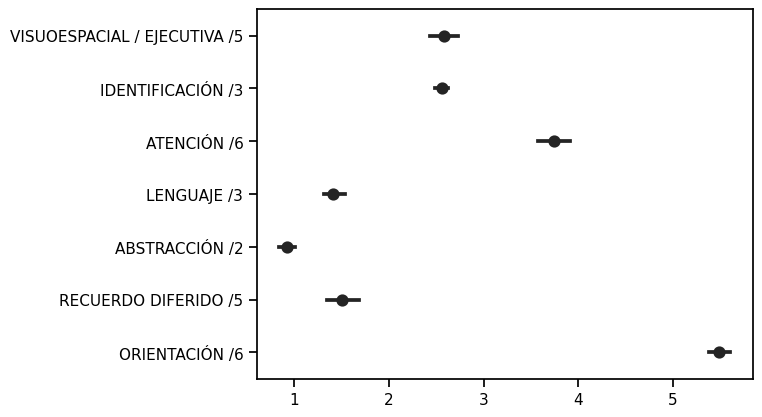

In [10]:
sns.pointplot(
    data[
        [
            "VISUOESPACIAL / EJECUTIVA /5",
            "IDENTIFICACIÓN /3",
            "ATENCIÓN /6",
            "LENGUAJE /3",
            "ABSTRACCIÓN /2",
            "RECUERDO DIFERIDO /5",
            "ORIENTACIÓN /6",
        ]
    ],
    errorbar="ci",
    linestyle="none",
    orient="h",
)

/tmp/ipykernel_2167/4003051706.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["Visuospatial","Naming", "Attention", "Language", "Abstraction", "Memory", "Orientation"]);


(0.0, 1.0)

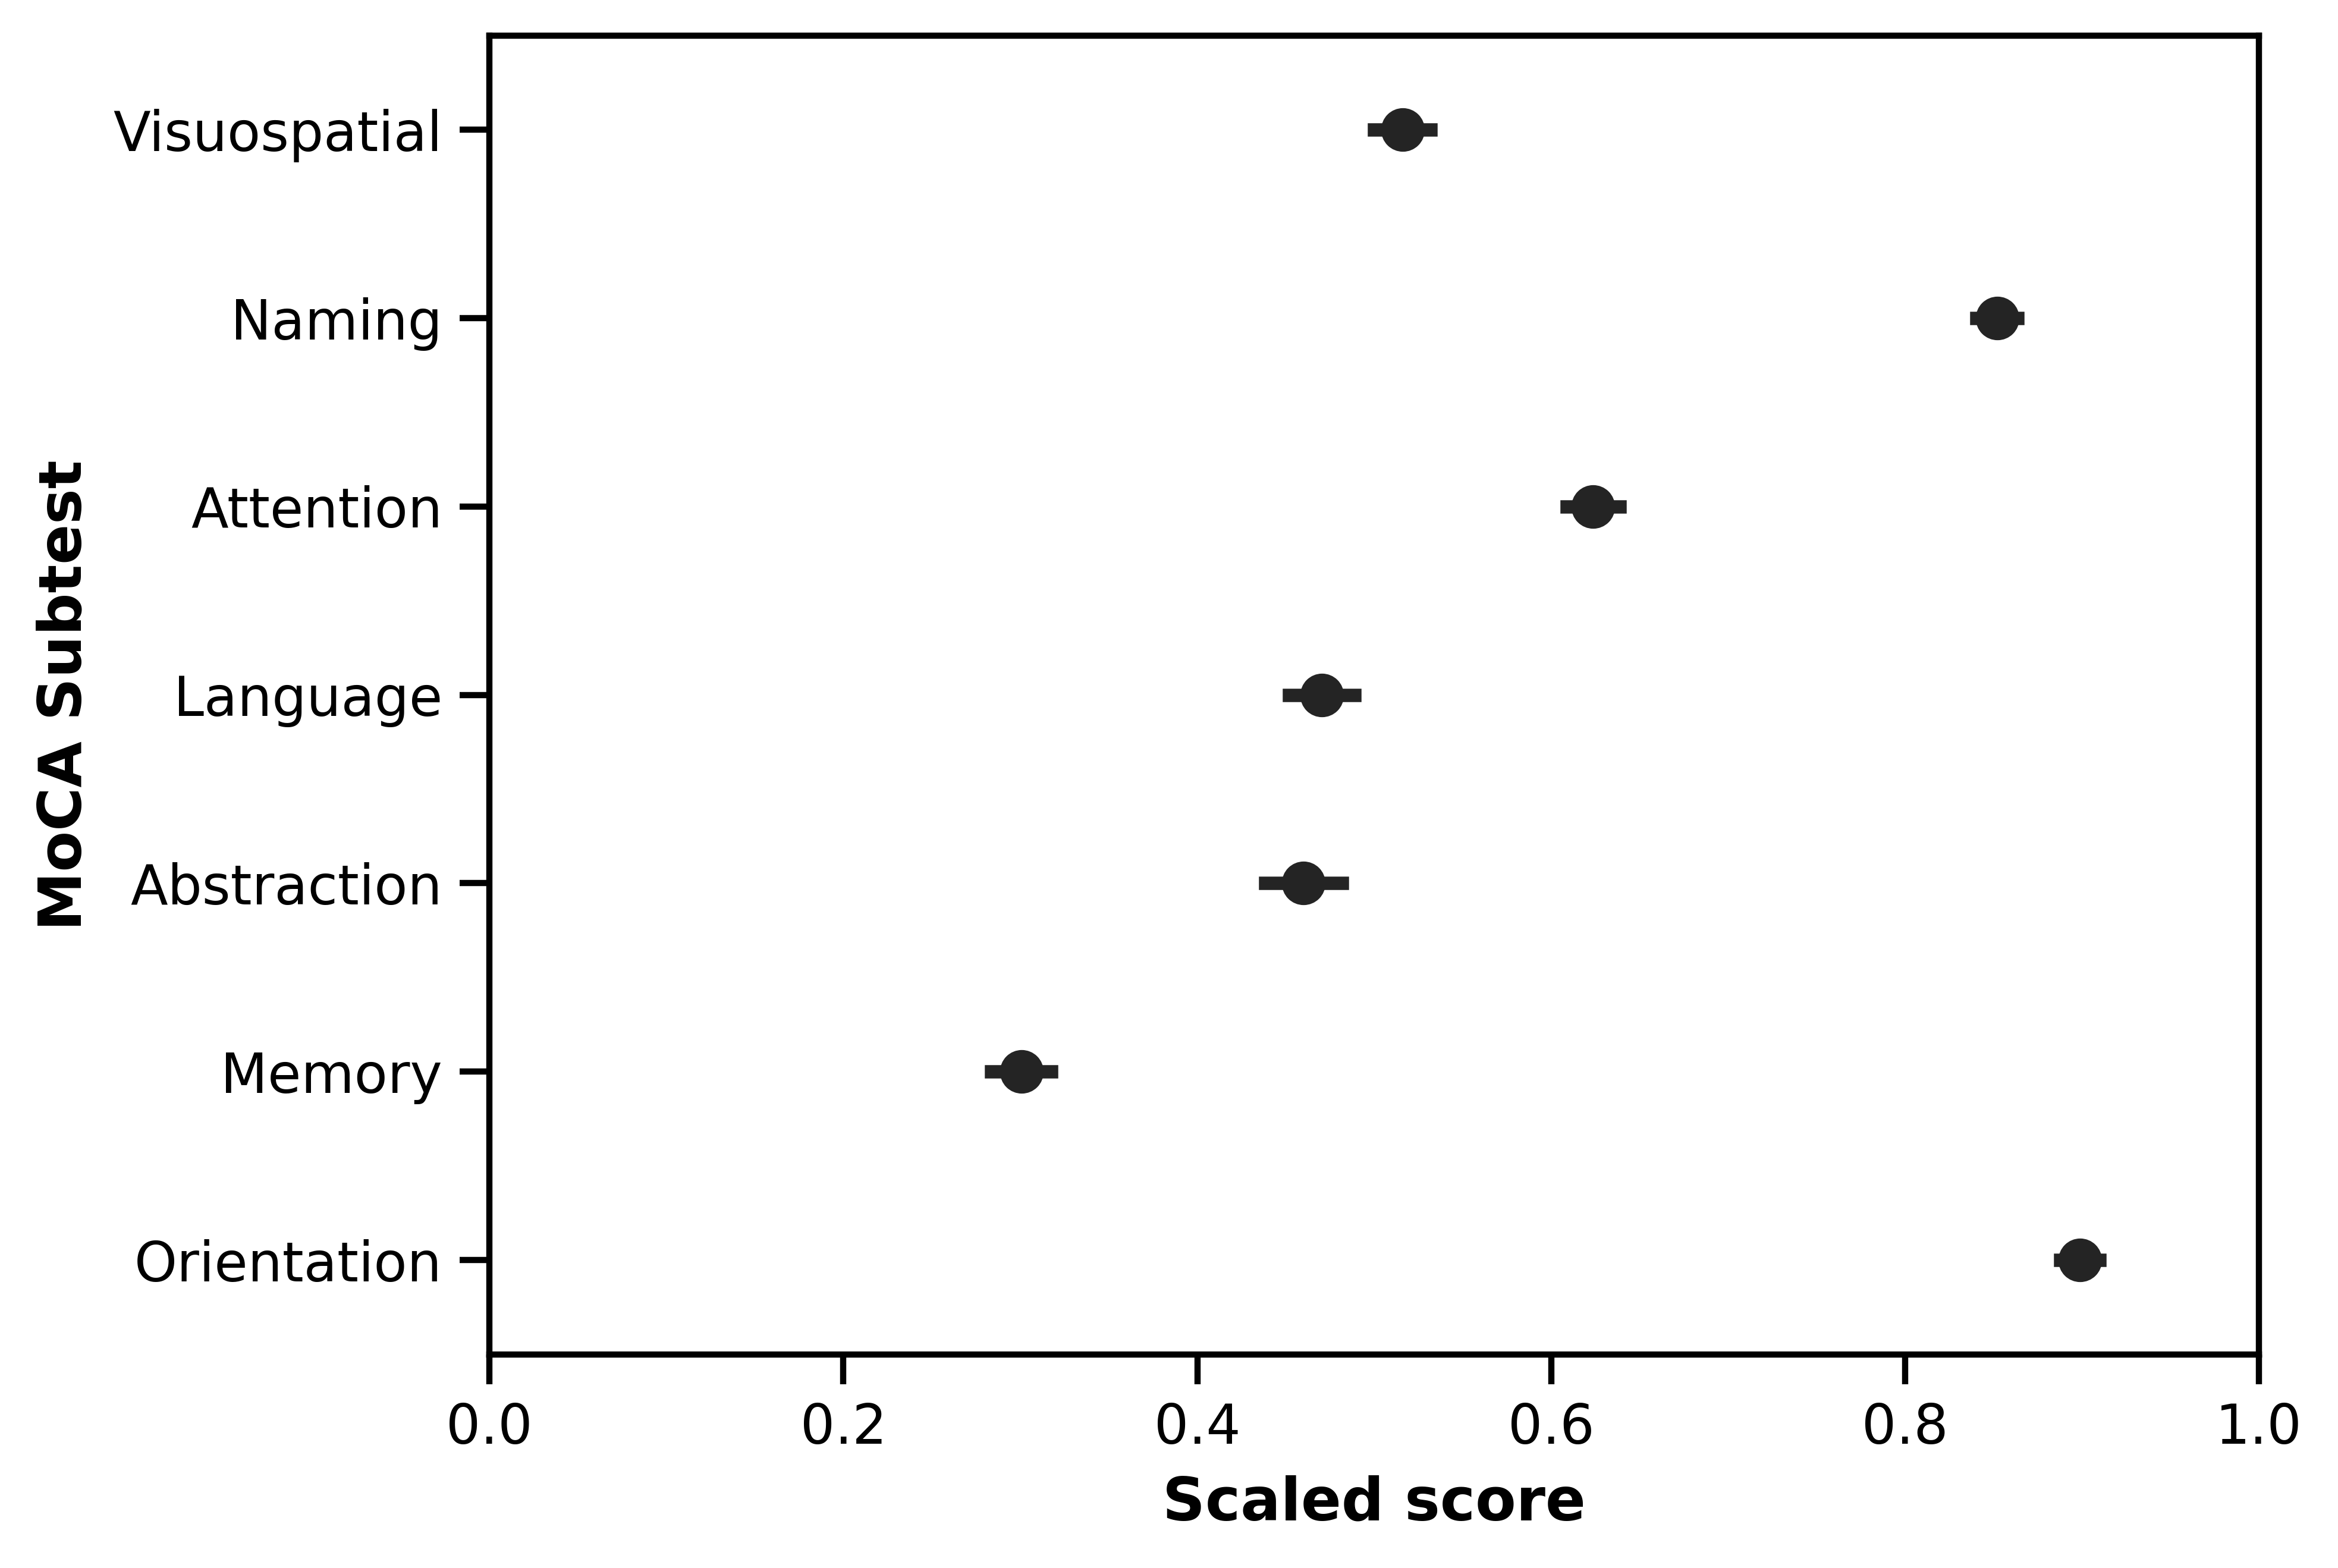

In [80]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

df = data[
    [
        "VISUOESPACIAL / EJECUTIVA /5",
        "IDENTIFICACIÓN /3",
        "ATENCIÓN /6",
        "LENGUAJE /3",
        "ABSTRACCIÓN /2",
        "RECUERDO DIFERIDO /5",
        "ORIENTACIÓN /6",
    ]
]
x = df.values  # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

# normalized_df
fig = plt.figure(dpi=600)
ax = sns.pointplot(normalized_df, errorbar="se", linestyle="none", orient="h")
ax.set_yticklabels(
    [
        "Visuospatial",
        "Naming",
        "Attention",
        "Language",
        "Abstraction",
        "Memory",
        "Orientation",
    ]
)
ax.set_xlabel("Scaled score", size=12, weight="bold")
ax.set_ylabel("MoCA Subtest", size=12, weight="bold")
ax.set_xlim(0, 1)

In [12]:
data.groupby("Sexo").describe()

Edad                                                       \
      count       mean   min    25%   50%    75%   max       std   
Sexo                                                               
F     216.0  72.819444  60.0  65.75  72.0  79.00  99.0  8.570354   
M     122.0  74.811475  60.0  68.00  74.5  81.75  94.0  8.361988   

     Anos de estudios                                                   Fecha  \
                count       mean  min   25%   50%   75%   max       std count   
Sexo                                                                            
F               216.0  11.476852  2.0   8.0  11.0  16.0  24.0  4.219492   216   
M               122.0  12.262295  1.0  11.0  11.0  17.0  21.0  4.253930   122   

                                                                               \
                               mean                  min                  25%   
Sexo                                                                            
F               2024-03-30 04:20:00  2023-12-13 00:00:00  2024-03-11 00:00:00   
M     2024-04-05 17:30:29.508196608  2024-01-18 00:00:00  2024-03-15 18:00:00   

                                                                          \
                      50%                  75%                  max  std   
Sexo                                                                       
F     2024-04-01 00:00:00  2024-04-22 00:00:00  2024-05-29 00:00:00  NaN   
M     2024-04-05 00:00:00  2024-04-29 18:00:00  2024-05-29 00:00:00  NaN   

     VISUOESPACIAL / EJECUTIVA /5                                     \
                            count      mean  min  25%  50%  75%  max   
Sexo                                                                   
F                           216.0  2.495370  0.0  1.0  2.0  4.0  5.0   
M                           122.0  2.729508  0.0  2.0  3.0  4.0  5.0   

               IDENTIFICACIÓN /3                                               \
           std             count      mean  min  25%  50%  75%  max       std   
Sexo                                                                            
F     1.469053             216.0  2.476852  0.0  2.0  3.0  3.0  3.0  0.681600   
M     1.460425             122.0  2.696721  0.0  2.0  3.0  3.0  3.0  0.528359   

     ATENCIÓN /6                                              LENGUAJE /3  \
           count      mean  min  25%  50%  75%  max       std       count   
Sexo                                                                        
F          216.0  3.518519  0.0  2.0  4.0  5.0  6.0  1.733294       216.0   
M          122.0  4.139344  0.0  3.0  4.0  5.0  6.0  1.456337       122.0   

                                                  ABSTRACCIÓN /2            \
          mean  min  25%  50%  75%  max       std          count      mean   
Sexo                                                                         
F     1.384259  0.0  1.0  1.0  2.0  3.0  1.023234          216.0  0.884259   
M     1.459016  0.0  1.0  2.0  2.0  3.0  1.005337          122.0  0.983607   

                                        RECUERDO DIFERIDO /5                 \
      min  25%  50%  75%  max       std                count      mean  min   
Sexo                                                                          
F     0.0  0.0  1.0  2.0  2.0  0.789779                216.0  1.546296  0.0   
M     0.0  0.0  1.0  2.0  2.0  0.812949                122.0  1.426230  0.0   

                                   ORIENTACIÓN /6                            \
      25%  50%  75%  max       std          count      mean  min   25%  50%   
Sexo                                                                          
F     0.0  1.0  3.0  5.0  1.587066          216.0  5.449074  1.0  5.00  6.0   
M     0.0  1.0  3.0  5.0  1.536972          122.0  5.573770  1.0  5.25  6.0   

                         MIS /15                                       \
      75%  max       std   count      mean  min  25%  50%   75% 

In [13]:
pd.crosstab(
    data["Rango de edad"],
    data["Sexo"],
    margins=True,
    margins_name="Total",
    normalize=False,
).round(3)

Sexo,F,M,Total
Rango de edad,,,
60-64,40,11,51
65-69,44,26,70
70-74,49,24,73
75-79,35,22,57
80+,48,39,87
Total,216,122,338


In [14]:
_, _, res = pg.chi2_independence(x="Rango de edad", y="Sexo", data=data)
res

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,8.057543,4.0,0.089493,0.154398,0.608272
1,cressie-read,0.666667,8.145147,4.0,0.086404,0.155236,0.613634
2,log-likelihood,0.000000,8.371205,4.0,0.078889,0.157375,0.627256
3,freeman-tukey,-0.500000,8.590579,4.0,0.072189,0.159424,0.640175
4,mod-log-likelihood,-1.000000,8.858799,4.0,0.064727,0.161893,0.655565
5,neyman,-2.000000,9.570116,4.0,0.048326,0.168268,0.694191


In [15]:
pd.crosstab(
    data["Rango de nivel educativo"],
    data["Sexo"],
    margins=True,
    margins_name="Total",
    normalize=False,
).round(3)

Sexo,F,M,Total
Rango de nivel educativo,,,
Básica (0-6 años),50,19,69
Secundaria (7-11 años),90,51,141
Superior (12+ años),76,52,128
Total,216,122,338


In [16]:
_, _, res = pg.chi2_independence(
    x="Rango de nivel educativo", y="Sexo", data=data
)
res

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3.330338,2.0,0.189159,0.099263,0.352981
1,cressie-read,0.666667,3.352810,2.0,0.187045,0.099597,0.355108
2,log-likelihood,0.000000,3.404635,2.0,0.182261,0.100364,0.360007
3,freeman-tukey,-0.500000,3.449886,2.0,0.178183,0.101029,0.364276
4,mod-log-likelihood,-1.000000,3.500990,2.0,0.173688,0.101774,0.369088
5,neyman,-2.000000,3.622330,2.0,0.163464,0.103523,0.380468


<Axes: xlabel='Edad', ylabel='Count'>

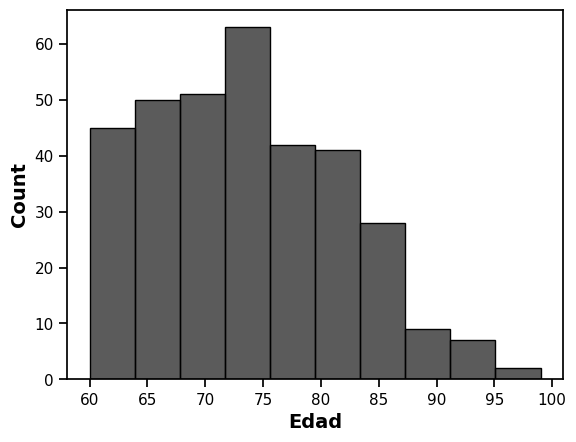

In [17]:
sns.histplot(x="Edad", data=data)

<Axes: xlabel='Rango de edad', ylabel='Count'>

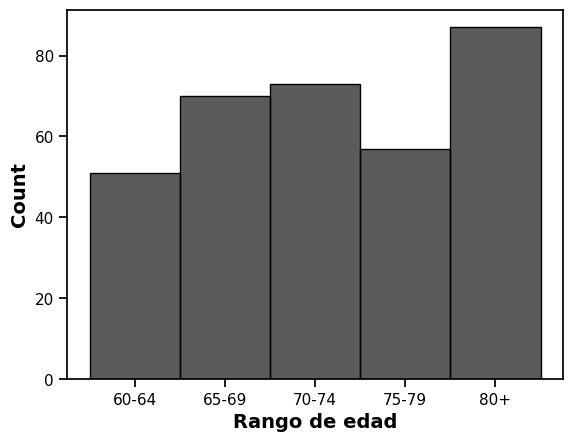

In [18]:
sns.histplot(x="Rango de edad", data=data.sort_values(by=["Edad"]))

<Axes: xlabel='Sexo', ylabel='Count'>

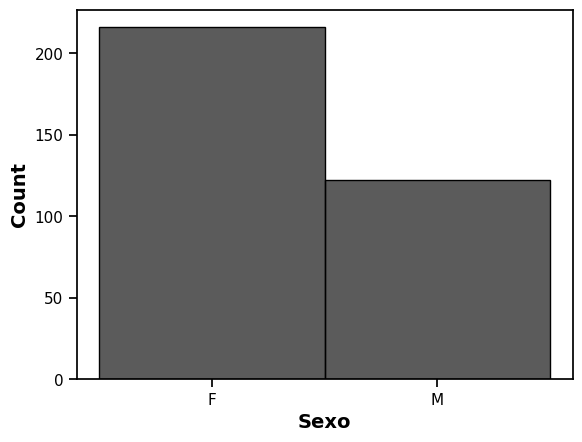

In [19]:
sns.histplot(x="Sexo", data=data)

<Axes: xlabel='Anos de estudios', ylabel='Count'>

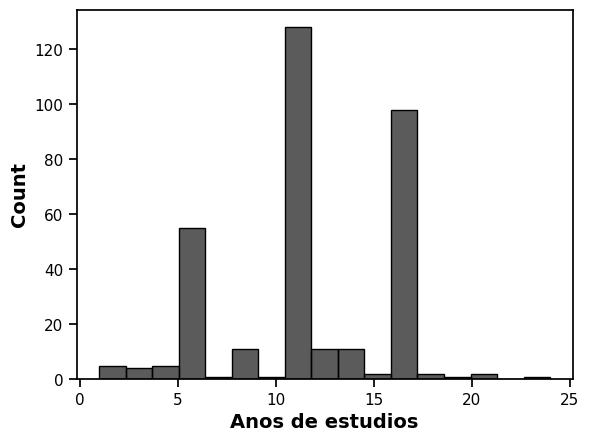

In [20]:
sns.histplot(x="Anos de estudios", data=data)

<Axes: xlabel='Rango de nivel educativo', ylabel='Count'>

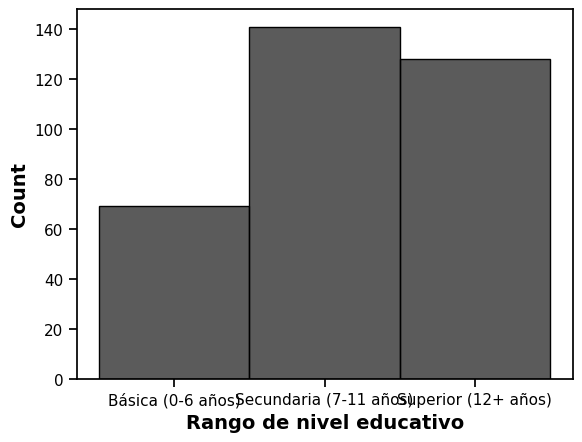

In [21]:
sns.histplot(
    x="Rango de nivel educativo",
    data=data.sort_values(by=["Anos de estudios"]),
)

<Axes: xlabel='TOTAL /30', ylabel='Count'>

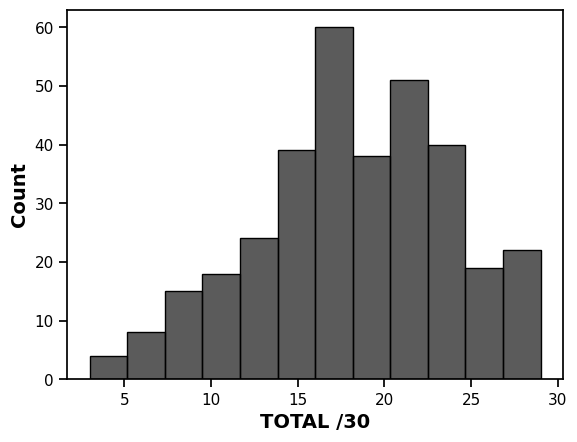

In [22]:
sns.histplot(x="TOTAL /30", data=data)

<Axes: xlabel='VISUOESPACIAL / EJECUTIVA /5', ylabel='Count'>

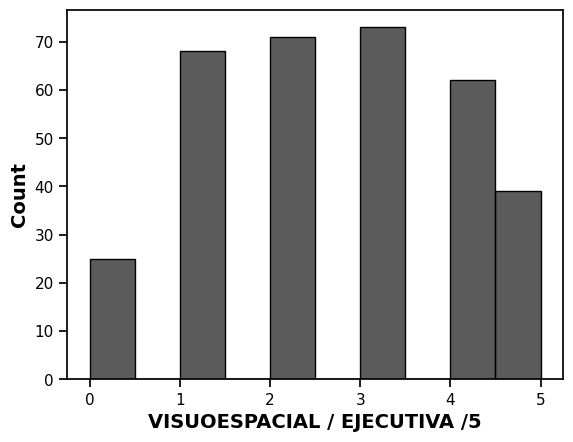

In [23]:
sns.histplot(x="VISUOESPACIAL / EJECUTIVA /5", data=data)

<Axes: xlabel='IDENTIFICACIÓN /3', ylabel='Count'>

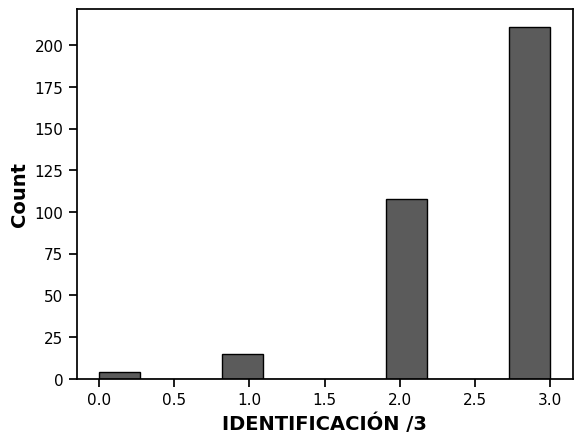

In [24]:
sns.histplot(x="IDENTIFICACIÓN /3", data=data)

<Axes: xlabel='ATENCIÓN /6', ylabel='Count'>

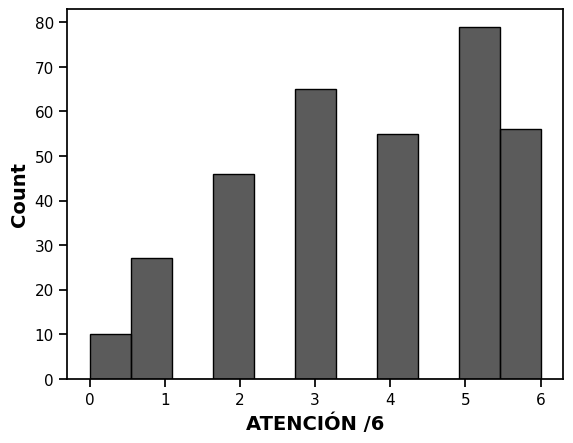

In [25]:
sns.histplot(x="ATENCIÓN /6", data=data)

<Axes: xlabel='LENGUAJE /3', ylabel='Count'>

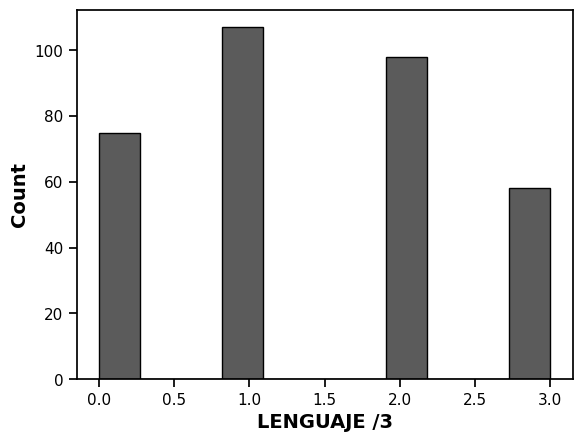

In [26]:
sns.histplot(x="LENGUAJE /3", data=data)

<Axes: xlabel='ABSTRACCIÓN /2', ylabel='Count'>

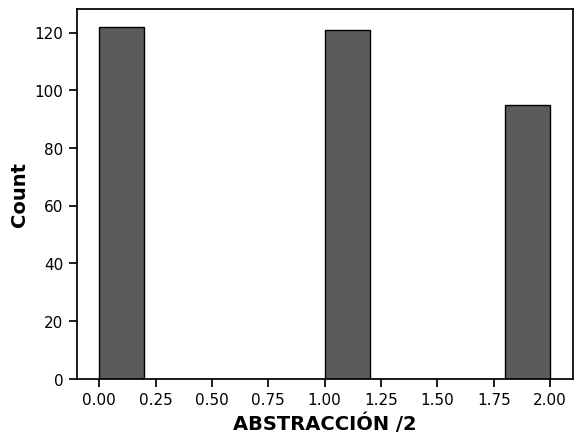

In [27]:
sns.histplot(x="ABSTRACCIÓN /2", data=data)

<Axes: xlabel='RECUERDO DIFERIDO /5', ylabel='Count'>

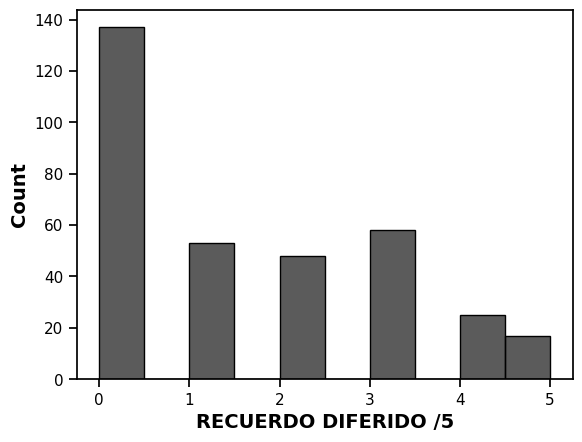

In [28]:
sns.histplot(x="RECUERDO DIFERIDO /5", data=data)

<Axes: xlabel='ORIENTACIÓN /6', ylabel='Count'>

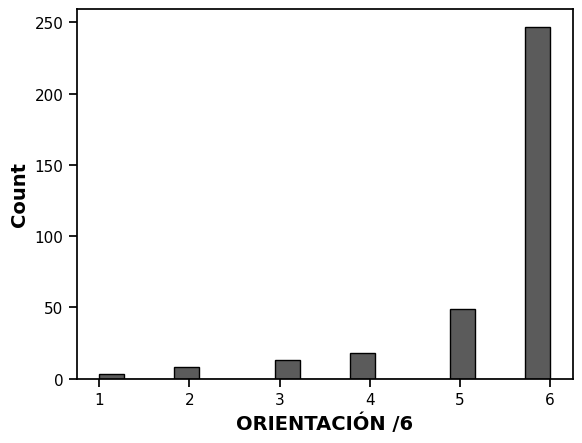

In [29]:
sns.histplot(x="ORIENTACIÓN /6", data=data)

In [30]:
pg.pairwise_corr(
    columns=[
        ["TOTAL /30"],
        [
            "VISUOESPACIAL / EJECUTIVA /5",
            "IDENTIFICACIÓN /3",
            "ATENCIÓN /6",
            "LENGUAJE /3",
            "ABSTRACCIÓN /2",
            "RECUERDO DIFERIDO /5",
            "ORIENTACIÓN /6",
        ],
    ],
    data=data,
    method="kendall",
    padjust="bonf",
).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,TOTAL /30,VISUOESPACIAL / EJECUTIVA /5,kendall,two-sided,338,0.641,"[0.57, 0.7]",0.0,0.0,bonf,1.0
1,TOTAL /30,IDENTIFICACIÓN /3,kendall,two-sided,338,0.445,"[0.35, 0.53]",0.0,0.0,bonf,1.0
2,TOTAL /30,ATENCIÓN /6,kendall,two-sided,338,0.634,"[0.57, 0.69]",0.0,0.0,bonf,1.0
3,TOTAL /30,LENGUAJE /3,kendall,two-sided,338,0.557,"[0.48, 0.63]",0.0,0.0,bonf,1.0
4,TOTAL /30,ABSTRACCIÓN /2,kendall,two-sided,338,0.524,"[0.44, 0.6]",0.0,0.0,bonf,1.0
5,TOTAL /30,RECUERDO DIFERIDO /5,kendall,two-sided,338,0.535,"[0.45, 0.61]",0.0,0.0,bonf,1.0
6,TOTAL /30,ORIENTACIÓN /6,kendall,two-sided,338,0.427,"[0.34, 0.51]",0.0,0.0,bonf,1.0


## Effects of age, education and sex

In [31]:
pg.pairwise_corr(
    columns=[
        ["Edad", "Anos de estudios"],
        [
            "VISUOESPACIAL / EJECUTIVA /5",
            "IDENTIFICACIÓN /3",
            "ATENCIÓN /6",
            "LENGUAJE /3",
            "ABSTRACCIÓN /2",
            "RECUERDO DIFERIDO /5",
            "ORIENTACIÓN /6",
            "TOTAL /30",
        ],
    ],
    data=data,
    method="kendall",
    padjust="bonf",
).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,Edad,VISUOESPACIAL / EJECUTIVA /5,kendall,two-sided,338,-0.228,"[-0.33, -0.12]",0.0,0.000,bonf,0.989
1,Edad,IDENTIFICACIÓN /3,kendall,two-sided,338,-0.170,"[-0.27, -0.06]",0.0,0.002,bonf,0.882
2,Edad,ATENCIÓN /6,kendall,two-sided,338,-0.159,"[-0.26, -0.05]",0.0,0.001,bonf,0.837
3,Edad,LENGUAJE /3,kendall,two-sided,338,-0.168,"[-0.27, -0.06]",0.0,0.001,bonf,0.875
4,Edad,ABSTRACCIÓN /2,kendall,two-sided,338,-0.194,"[-0.29, -0.09]",0.0,0.000,bonf,0.950
5,Edad,RECUERDO DIFERIDO /5,kendall,two-sided,338,-0.177,"[-0.28, -0.07]",0.0,0.000,bonf,0.905
6,Edad,ORIENTACIÓN /6,kendall,two-sided,338,-0.207,"[-0.31, -0.1]",0.0,0.000,bonf,0.970
7,Edad,TOTAL /30,kendall,two-sided,338,-0.244,"[-0.34, -0.14]",0.0,0.000,bonf,0.995
8,Anos de estudios,VISUOESPACIAL / EJECUTIVA /5,kendall,two-sided,338,0.344,"[0.25, 0.43]",0.0,0.000,bonf,1.000
9,Anos de estudios,IDENTIFICACIÓN /3,kendall,two-sided,338,0.190,"[0.09, 0.29]",0.0,0.001,bonf,0.942


In [32]:
pg.linear_regression(X=data["Edad"], y=data["VISUOESPACIAL / EJECUTIVA /5"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.515601,0.660025,9.871753,2.383366e-20,0.096859,0.094171,5.217300,7.813902
1,Edad,-0.053519,0.008916,-6.002918,5.023878e-09,0.096859,0.094171,-0.071056,-0.035982


In [33]:
pg.linear_regression(X=data["Edad"], y=data["IDENTIFICACIÓN /3"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.715579,0.295317,12.581658,5.222441e-30,0.044421,0.041577,3.134676,4.296483
1,Edad,-0.015765,0.003989,-3.952123,9.445160e-05,0.044421,0.041577,-0.023612,-0.007919


In [34]:
pg.linear_regression(X=data["Edad"], y=data["ATENCIÓN /6"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.916697,0.767425,9.012861,1.549633e-17,0.049065,0.046235,5.407134,8.426260
1,Edad,-0.043162,0.010366,-4.163726,3.983707e-05,0.049065,0.046235,-0.063553,-0.022771


In [35]:
pg.linear_regression(X=data["Edad"], y=data["LENGUAJE /3"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.252088,0.469864,6.921338,2.276149e-11,0.044248,0.041403,2.327842,4.176334
1,Edad,-0.025032,0.006347,-3.944060,9.753957e-05,0.044248,0.041403,-0.037517,-0.012548


In [36]:
pg.linear_regression(X=data["Edad"], y=data["ABSTRACCIÓN /2"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.64604,0.365635,7.236826,3.140886e-12,0.062973,0.060184,1.926817,3.365263
1,Edad,-0.02347,0.004939,-4.751944,2.991132e-06,0.062973,0.060184,-0.033185,-0.013754


In [37]:
pg.linear_regression(X=data["Edad"], y=data["RECUERDO DIFERIDO /5"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.621318,0.721708,6.403311,5.122061e-10,0.053308,0.050491,3.201683,6.040952
1,Edad,-0.042404,0.009749,-4.349741,1.809963e-05,0.053308,0.050491,-0.061581,-0.023228


In [38]:
pg.linear_regression(X=data["Edad"], y=data["ORIENTACIÓN /6"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.652522,0.470487,16.26511,2.774130e-44,0.059691,0.056893,6.727051,8.577993
1,Edad,-0.029351,0.006355,-4.61839,5.515783e-06,0.059691,0.056893,-0.041852,-0.016850


In [39]:
pg.linear_regression(X=data["Edad"], y=data["TOTAL /30"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,35.319845,2.493613,14.164122,4.904686e-36,0.124381,0.121775,30.414784,40.224905
1,Edad,-0.232705,0.033683,-6.908584,2.462650e-11,0.124381,0.121775,-0.298962,-0.166448


In [40]:
pg.linear_regression(
    X=data["Anos de estudios"], y=data["VISUOESPACIAL / EJECUTIVA /5"]
)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.895066,0.214808,4.166812,3.932795e-05,0.171394,0.168928,0.472527,1.317604
1,Anos de estudios,0.143262,0.017185,8.336680,1.985807e-15,0.171394,0.168928,0.109459,0.177065


In [41]:
pg.linear_regression(X=data["Anos de estudios"], y=data["IDENTIFICACIÓN /3"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.104354,0.099247,21.203098,6.201489e-64,0.065155,0.062373,1.909130,2.299579
1,Anos de estudios,0.038422,0.007940,4.839213,1.990205e-06,0.065155,0.062373,0.022804,0.054040


In [42]:
pg.linear_regression(X=data["Anos de estudios"], y=data["ATENCIÓN /6"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.102032,0.249902,8.411424,1.174733e-15,0.126568,0.123969,1.610462,2.593601
1,Anos de estudios,0.139500,0.019992,6.977779,1.604389e-11,0.126568,0.123969,0.100175,0.178826


In [43]:
pg.linear_regression(X=data["Anos de estudios"], y=data["LENGUAJE /3"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.241505,0.148550,1.625746,1.049413e-01,0.172517,0.170055,-0.050701,0.533711
1,Anos de estudios,0.099464,0.011884,8.369638,1.576020e-15,0.172517,0.170055,0.076088,0.122841


In [44]:
pg.linear_regression(X=data["Anos de estudios"], y=data["ABSTRACCIÓN /2"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.095074,0.119091,0.798329,4.252435e-01,0.138952,0.136389,-0.139185,0.329333
1,Anos de estudios,0.070155,0.009527,7.363570,1.393089e-12,0.138952,0.136389,0.051414,0.088895


In [45]:
pg.linear_regression(
    X=data["Anos de estudios"], y=data["RECUERDO DIFERIDO /5"]
)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.479743,0.244946,1.958565,0.050991,0.055421,0.05261,-0.002078,0.961564
1,Anos de estudios,0.087006,0.019596,4.440054,0.000012,0.055421,0.05261,0.048460,0.125551


In [46]:
pg.linear_regression(X=data["Anos de estudios"], y=data["ORIENTACIÓN /6"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.532366,0.155138,29.214989,2.970562e-94,0.114426,0.11179,4.227201,4.837531
1,Anos de estudios,0.081776,0.012411,6.589003,1.712076e-10,0.114426,0.11179,0.057363,0.106189


In [47]:
pg.linear_regression(X=data["Anos de estudios"], y=data["TOTAL /30"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,10.450139,0.785831,13.298199,1.035097e-32,0.246772,0.24453,8.904371,11.995908
1,Anos de estudios,0.659586,0.062866,10.491896,1.828676e-22,0.246772,0.24453,0.535925,0.783247


In [48]:
# Primera fila Edad, segunda Anos de estudios
pg.multicomp(
    [
        5.023878e-09,
        9.445160e-05,
        3.983707e-05,
        9.753957e-05,
        2.991132e-06,
        1.809963e-05,
        5.515783e-06,
        2.462650e-11,
        1.985807e-15,
        1.990205e-06,
        1.604389e-11,
        1.576020e-15,
        1.393089e-12,
        0.000012,
        1.712076e-10,
        1.828676e-22,
    ],
    method="bonf",
)

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 array([8.03820480e-08, 1.51122560e-03, 6.37393120e-04, 1.56063312e-03,
        4.78581120e-05, 2.89594080e-04, 8.82525280e-05, 3.94024000e-10,
        3.17729120e-14, 3.18432800e-05, 2.56702240e-10, 2.52163200e-14,
        2.22894240e-11, 1.92000000e-04, 2.73932160e-09, 2.92588160e-21]))

<Axes: xlabel='Sexo', ylabel='TOTAL /30'>

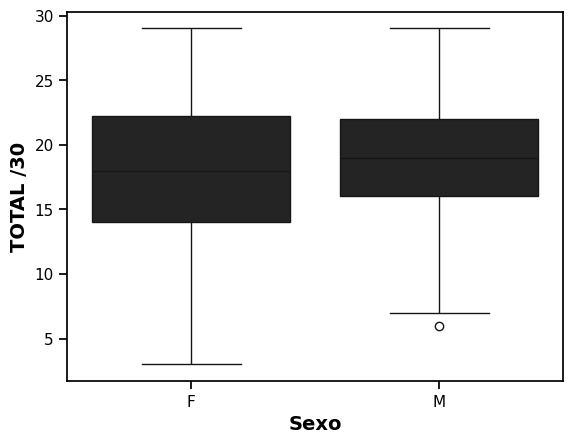

In [49]:
sns.boxplot(x="Sexo", y="TOTAL /30", data=data)

In [50]:
data.groupby("Sexo").describe()

Edad                                                       \
      count       mean   min    25%   50%    75%   max       std   
Sexo                                                               
F     216.0  72.819444  60.0  65.75  72.0  79.00  99.0  8.570354   
M     122.0  74.811475  60.0  68.00  74.5  81.75  94.0  8.361988   

     Anos de estudios                                                   Fecha  \
                count       mean  min   25%   50%   75%   max       std count   
Sexo                                                                            
F               216.0  11.476852  2.0   8.0  11.0  16.0  24.0  4.219492   216   
M               122.0  12.262295  1.0  11.0  11.0  17.0  21.0  4.253930   122   

                                                                               \
                               mean                  min                  25%   
Sexo                                                                            
F               2024-03-30 04:20:00  2023-12-13 00:00:00  2024-03-11 00:00:00   
M     2024-04-05 17:30:29.508196608  2024-01-18 00:00:00  2024-03-15 18:00:00   

                                                                          \
                      50%                  75%                  max  std   
Sexo                                                                       
F     2024-04-01 00:00:00  2024-04-22 00:00:00  2024-05-29 00:00:00  NaN   
M     2024-04-05 00:00:00  2024-04-29 18:00:00  2024-05-29 00:00:00  NaN   

     VISUOESPACIAL / EJECUTIVA /5                                     \
                            count      mean  min  25%  50%  75%  max   
Sexo                                                                   
F                           216.0  2.495370  0.0  1.0  2.0  4.0  5.0   
M                           122.0  2.729508  0.0  2.0  3.0  4.0  5.0   

               IDENTIFICACIÓN /3                                               \
           std             count      mean  min  25%  50%  75%  max       std   
Sexo                                                                            
F     1.469053             216.0  2.476852  0.0  2.0  3.0  3.0  3.0  0.681600   
M     1.460425             122.0  2.696721  0.0  2.0  3.0  3.0  3.0  0.528359   

     ATENCIÓN /6                                              LENGUAJE /3  \
           count      mean  min  25%  50%  75%  max       std       count   
Sexo                                                                        
F          216.0  3.518519  0.0  2.0  4.0  5.0  6.0  1.733294       216.0   
M          122.0  4.139344  0.0  3.0  4.0  5.0  6.0  1.456337       122.0   

                                                  ABSTRACCIÓN /2            \
          mean  min  25%  50%  75%  max       std          count      mean   
Sexo                                                                         
F     1.384259  0.0  1.0  1.0  2.0  3.0  1.023234          216.0  0.884259   
M     1.459016  0.0  1.0  2.0  2.0  3.0  1.005337          122.0  0.983607   

                                        RECUERDO DIFERIDO /5                 \
      min  25%  50%  75%  max       std                count      mean  min   
Sexo                                                                          
F     0.0  0.0  1.0  2.0  2.0  0.789779                216.0  1.546296  0.0   
M     0.0  0.0  1.0  2.0  2.0  0.812949                122.0  1.426230  0.0   

                                   ORIENTACIÓN /6                            \
      25%  50%  75%  max       std          count      mean  min   25%  50%   
Sexo                                                                          
F     0.0  1.0  3.0  5.0  1.587066          216.0  5.449074  1.0  5.00  6.0   
M     0.0  1.0  3.0  5.0  1.536972          122.0  5.573770  1.0  5.25  6.0   

                         MIS /15                                       \
      75%  max       std   count      mean  min  25%  50%   75% 

In [51]:
pg.pairwise_tests(
    dv="VISUOESPACIAL / EJECUTIVA /5",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,11890.0,two-sided,0.129232,0.451199


In [52]:
pg.pairwise_tests(
    dv="IDENTIFICACIÓN /3",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,10984.5,two-sided,0.002842,0.416837


In [53]:
pg.pairwise_tests(
    dv="ATENCIÓN /6",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,10540.5,two-sided,0.001911,0.399989


In [54]:
pg.pairwise_tests(
    dv="LENGUAJE /3",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,12568.0,two-sided,0.464825,0.476928


In [55]:
pg.pairwise_tests(
    dv="ABSTRACCIÓN /2",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,12298.5,two-sided,0.279907,0.466701


In [56]:
pg.pairwise_tests(
    dv="RECUERDO DIFERIDO /5",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,13712.0,two-sided,0.517842,0.52034


In [57]:
pg.pairwise_tests(
    dv="ORIENTACIÓN /6",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,12706.5,two-sided,0.485187,0.482184


In [58]:
pg.pairwise_tests(
    dv="TOTAL /30",
    between="Sexo",
    correction=True,
    data=data,
    effsize="CLES",
    parametric=False,
)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,CLES
0,Sexo,F,M,False,False,11765.5,two-sided,0.101684,0.446475


In [59]:
pg.multicomp(
    [
        0.129232,
        0.002842,
        0.001911,
        0.464825,
        0.279907,
        0.517842,
        0.485187,
        0.101684,
    ],
    method="bonferroni",
)

(array([False,  True,  True, False, False, False, False, False]),
 array([1.      , 0.022736, 0.015288, 1.      , 1.      , 1.      ,
        1.      , 0.813472]))

<Axes: xlabel='Rango de edad', ylabel='TOTAL /30'>

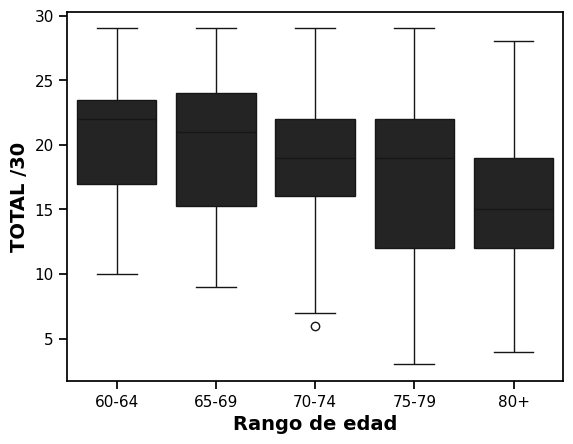

In [60]:
sns.boxplot(
    x="Rango de edad", y="TOTAL /30", data=data.sort_values(by=["Edad"])
)

In [61]:
data.groupby("Rango de edad").describe()

Edad                                                      \
              count       mean   min    25%   50%   75%   max       std   
Rango de edad                                                             
60-64          51.0  61.666667  60.0  60.00  62.0  63.0  64.0  1.437591   
65-69          70.0  66.728571  65.0  65.25  66.0  68.0  69.0  1.433769   
70-74          73.0  72.150685  70.0  71.00  72.0  73.0  74.0  1.340307   
75-79          57.0  76.947368  75.0  75.00  77.0  78.0  79.0  1.528550   
80+            87.0  84.908046  80.0  82.00  84.0  87.0  99.0  4.277122   

              Anos de estudios                                          \
                         count       mean  min   25%   50%   75%   max   
Rango de edad                                                            
60-64                     51.0  12.705882  6.0  11.0  11.0  16.0  18.0   
65-69                     70.0  12.985714  6.0  11.0  12.0  17.0  20.0   
70-74                     73.0  11.630137  2.0  11.0  11.0  16.0  21.0   
75-79                     57.0  11.842105  1.0   6.0  11.0  17.0  24.0   
80+                       87.0  10.275862  2.0   6.0  11.0  14.0  17.0   

                        Fecha                                 \
                    std count                           mean   
Rango de edad                                                  
60-64          3.201838    51  2024-04-07 10:49:24.705882368   
65-69          3.657404    70  2024-04-09 10:37:42.857142784   
70-74          4.141614    73  2024-03-28 08:32:52.602739712   
75-79          4.857944    57  2024-03-21 00:50:31.578947328   
80+            4.484313    87  2024-04-02 18:45:31.034482688   

                                                                              \
                               min                  25%                  50%   
Rango de edad                                                                  
60-64          2023-12-13 00:00:00  2024-03-25 12:00:00  2024-04-05 00:00:00   
65-69          2024-01-09 00:00:00  2024-03-25 06:00:00  2024-04-11 00:00:00   
70-74          2023-12-13 00:00:00  2024-03-08 00:00:00  2024-03-27 00:00:00   
75-79          2024-01-18 00:00:00  2024-03-04 00:00:00  2024-03-22 00:00:00   
80+            2024-01-09 00:00:00  2024-03-11 00:00:00  2024-04-03 00:00:00   

                                                              \
                               75%                  max  std   
Rango de edad                                                  
60-64          2024-05-03 12:00:00  2024-05-29 00:00:00  NaN   
65-69          2024-04-29 18:00:00  2024-05-29 00:00:00  NaN   
70-74          2024-04-17 00:00:00  2024-05-29 00:00:00  NaN   
75-79          2024-04-12 00:00:00  2024-05-28 00:00:00  NaN   
80+            2024-05-01 00:00:00  2024-05-29 00:00:00  NaN   

              VISUOESPACIAL / EJECUTIVA /5                                     \
                                     count      mean  min  25%  50%  75%  max   
Rango de edad                                                                   
60-64                                 51.0  3.156863  0.0  2.0  3.0  4.0  5.0   
65-69                                 70.0  3.000000  0.0  2.0  3.0  4.0  5.0   
70-74                                 73.0  2.520548  0.0  1.0  2.0  4.0  5.0   
75-79                                 57.0  2.631579  0.0  1.0  3.0  4.0  5.0   
80+                                   87.0  1.919540  0.0  1.0  2.0  3.0  5.0   

                        IDENTIFICACIÓN /3                                     \
                    std             count      mean  min  25%  50%  75%  max   
Rango de edad                                                                  
60-64          1.254951              51.0  2.568627  0.0  2.0  3.0  3.0  3.0   
65-69          1.434563              70.0  2.728571  0.0  3.0  3.0  3.0  3.0   
70-74          1.405442              73.0  2.684932  1.0  2.0  3.0  3.0  3.0   
75-79          1.610585  

In [62]:
pg.normality(dv="TOTAL /30", group="Rango de edad", data=data)

,W,pval,normal
Rango de edad,,,
60-64,0.956515,0.059277,True
70-74,0.976585,0.191843,True
65-69,0.958297,0.020183,False
75-79,0.958647,0.049206,False
80+,0.989718,0.730750,True


In [63]:
pg.homoscedasticity(dv="TOTAL /30", group="Rango de edad", data=data)

,W,pval,equal_var
levene,2.342546,0.054729,True


In [64]:
# pg.anova(dv="TOTAL /30", between=["Rango de edad"], data=data).round(3)
pg.kruskal(dv="TOTAL /30", between="Rango de edad", data=data)  # .round(3)

,Source,ddof1,H,p-unc
Kruskal,Rango de edad,4,40.001118,4.326119e-08


In [65]:
import scikit_posthocs as sp

sp.posthoc_dunn(
    a=data,
    val_col="TOTAL /30",
    group_col="Rango de edad",
    p_adjust="bonferroni",
)

,60-64,65-69,70-74,75-79,80+
60-64,1.000000e+00,1.000000,0.358554,0.031258,9.583062e-07
65-69,1.000000e+00,1.000000,1.000000,0.119052,3.285439e-06
70-74,3.585539e-01,1.000000,1.000000,1.000000,4.410679e-03
75-79,3.125780e-02,0.119052,1.000000,1.000000,2.938731e-01
80+,9.583062e-07,0.000003,0.004411,0.293873,1.000000e+00


In [66]:
# data.pairwise_tukey(dv="TOTAL /30", between="Rango de edad", effsize="cohen").round(3)
data.pairwise_tests(
    dv="TOTAL /30",
    between="Rango de edad",
    parametric=False,
    padjust="bonf",
    effsize="CLES",
).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,CLES
0,Rango de edad,60-64,65-69,False,False,1859.5,two-sided,0.697,1.000,bonf,0.521
1,Rango de edad,60-64,70-74,False,False,2322.0,two-sided,0.019,0.192,bonf,0.624
2,Rango de edad,60-64,75-79,False,False,1916.0,two-sided,0.004,0.044,bonf,0.659
3,Rango de edad,60-64,80+,False,False,3440.0,two-sided,0.000,0.000,bonf,0.775
4,Rango de edad,65-69,70-74,False,False,2946.5,two-sided,0.114,1.000,bonf,0.577
5,Rango de edad,65-69,75-79,False,False,2494.5,two-sided,0.015,0.154,bonf,0.625
6,Rango de edad,65-69,80+,False,False,4448.5,two-sided,0.000,0.000,bonf,0.730
7,Rango de edad,70-74,75-79,False,False,2282.0,two-sided,0.345,1.000,bonf,0.548
8,Rango de edad,70-74,80+,False,False,4274.5,two-sided,0.000,0.002,bonf,0.673
9,Rango de edad,75-79,80+,False,False,2955.5,two-sided,0.052,0.517,bonf,0.596


<Axes: xlabel='Rango de nivel educativo', ylabel='TOTAL /30'>

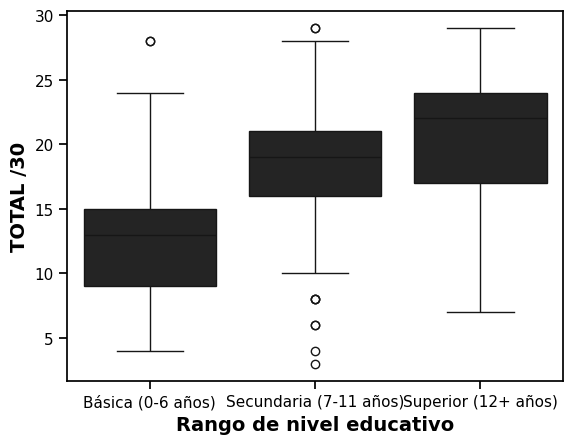

In [67]:
sns.boxplot(
    x="Rango de nivel educativo",
    y="TOTAL /30",
    data=data.sort_values(by=["Anos de estudios"]),
)

In [68]:
data.groupby("Rango de nivel educativo").describe()

Edad                                           \
                          count       mean   min   25%   50%   75%   max   
Rango de nivel educativo                                                   
Básica (0-6 años)          69.0  77.347826  60.0  72.0  78.0  82.0  95.0   
Secundaria (7-11 años)    141.0  73.049645  60.0  65.0  72.0  79.0  96.0   
Superior (12+ años)       128.0  72.023438  60.0  66.0  71.0  77.0  99.0   

                                   Anos de estudios                         \
                               std            count       mean   min   25%   
Rango de nivel educativo                                                     
Básica (0-6 años)         7.770279             69.0   5.434783   1.0   6.0   
Secundaria (7-11 años)    9.089496            141.0  10.751773   7.0  11.0   
Superior (12+ años)       7.715885            128.0  16.281250  12.0  16.0   

                                                     Fecha  \
                           50%   75%   max       std count   
Rango de nivel educativo                                     
Básica (0-6 años)          6.0   6.0   6.0  1.277385    69   
Secundaria (7-11 años)    11.0  11.0  11.0  0.812017   141   
Superior (12+ años)       17.0  17.0  24.0  1.640710   128   

                                                                              \
                                                   mean                  min   
Rango de nivel educativo                                                       
Básica (0-6 años)         2024-03-31 11:07:49.565217280  2024-01-09 00:00:00   
Secundaria (7-11 años)    2024-03-28 14:58:43.404255232  2023-12-13 00:00:00   
Superior (12+ años)                 2024-04-06 10:41:15  2023-12-13 00:00:00   

                                                                    \
                                          25%                  50%   
Rango de nivel educativo                                             
Básica (0-6 años)         2024-03-05 00:00:00  2024-03-27 00:00:00   
Secundaria (7-11 años)    2024-03-11 00:00:00  2024-04-01 00:00:00   
Superior (12+ años)       2024-03-20 06:00:00  2024-04-06 00:00:00   

                                                                         \
                                          75%                  max  std   
Rango de nivel educativo                                                  
Básica (0-6 años)         2024-05-11 00:00:00  2024-05-29 00:00:00  NaN   
Secundaria (7-11 años)    2024-04-18 00:00:00  2024-05-29 00:00:00  NaN   
Superior (12+ años)       2024-04-30 12:00:00  2024-05-29 00:00:00  NaN   

                         VISUOESPACIAL / EJECUTIVA /5                      \
                                                count      mean  min  25%   
Rango de nivel educativo                                                    
Básica (0-6 años)                                69.0  1.550725  0.0  1.0   
Secundaria (7-11 años)                          141.0  2.531915  0.0  2.0   
Superior (12+ años)                             128.0  3.187500  0.0  2.0   

                                                  IDENTIFICACIÓN /3            \
                          50%  75%  max       std             count      mean   
Rango de nivel educativo                                                        
Básica (0-6 años)         1.0  2.0  5.0  1.207041              69.0  2.231884   
Secundaria (7-11 años)    2.0  3.0  5.0  1.312322             141.0  2.588652   
Superior (12+ años)       3.0  4.0  5.0  1.445874             128.0  2.695312   

                                                            ATENCIÓN /6  \
                          min  25%  50%  75%  max       std       count   
Rango de nivel educativo                                                  
Básica (0-6 años)         0.0  2.0  2.0  3.0  3.0  0.769739        69.0   
Secundaria (7-11 años)    0.0  2.0  3.0  3.0  3.0  0.655427       141.0   
Superior (12+ años)       2.0  2.0  3.0  3.0  3.0 

In [69]:
pg.normality(dv="TOTAL /30", group="Rango de nivel educativo", data=data)

,W,pval,normal
Rango de nivel educativo,,,
Secundaria (7-11 años),0.972891,0.006638,False
Superior (12+ años),0.969079,0.005023,False
Básica (0-6 años),0.947965,0.006142,False


In [70]:
pg.homoscedasticity(
    dv="TOTAL /30", group="Rango de nivel educativo", data=data
)

,W,pval,equal_var
levene,0.155354,0.856174,True


In [71]:
# pg.anova(dv="TOTAL /30", between=["Rango de nivel educativo"], data=data).round(3)
pg.kruskal(
    dv="TOTAL /30", between="Rango de nivel educativo", data=data
)  # .round(3)

,Source,ddof1,H,p-unc
Kruskal,Rango de nivel educativo,2,79.801812,4.690906e-18


In [72]:
sp.posthoc_dunn(
    a=data,
    val_col="TOTAL /30",
    group_col="Rango de nivel educativo",
    p_adjust="bonferroni",
)  # .round(3)

,Básica (0-6 años),Secundaria (7-11 años),Superior (12+ años)
Básica (0-6 años),1.000000e+00,1.429053e-08,1.243998e-18
Secundaria (7-11 años),1.429053e-08,1.000000e+00,3.111866e-04
Superior (12+ años),1.243998e-18,3.111866e-04,1.000000e+00


In [73]:
data.pairwise_tests(
    dv="TOTAL /30",
    between="Rango de nivel educativo",
    parametric=False,
    padjust="bonf",
    effsize="CLES",
).round(3)
# data.pairwise_tukey(dv="TOTAL /30", between="Rango de nivel educativo").round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,CLES
0,Rango de nivel educativo,Básica (0-6 años),Secundaria (7-11 años),False,False,2185.5,two-sided,0.0,0.0,bonf,0.225
1,Rango de nivel educativo,Básica (0-6 años),Superior (12+ años),False,False,1278.0,two-sided,0.0,0.0,bonf,0.145
2,Rango de nivel educativo,Secundaria (7-11 años),Superior (12+ años),False,False,6292.0,two-sided,0.0,0.0,bonf,0.349


## Norms

References:

Ivnik, R. J., Malec, J. F., Smith, G. E., Tangalos, E. G., Petersen, R. C., Kokmen, E., & Kurland, L. T. (1992). Mayo's Older Americans Normative Studies: WAIS-R norms for ages 56 to 97. The Clinical Neuropsychologist, 6(S1), 1-30.

Ojeda, N., Pino, R. D., Ibarretxe-Bilbao, N., Schretlen, D. J., & Peña, J. (2016). Test de evaluación cognitiva de Montreal: normalización y estandarización de la prueba en población española. Rev. neurol.(Ed. impr.), 488-496.

Peña-Casanova, J., Blesa, R., Aguilar, M., Gramunt-Fombuena, N., Gómez-Ansón, B., Oliva, R., ... & Sol, J. M. (2009). Spanish multicenter normative studies (NEURONORMA project): Methods and sample characteristics. Archives of Clinical Neuropsychology, 24(4), 307-319.

Text(0.5, 0, 'Scaled Scores adjusted for age (SSa)')

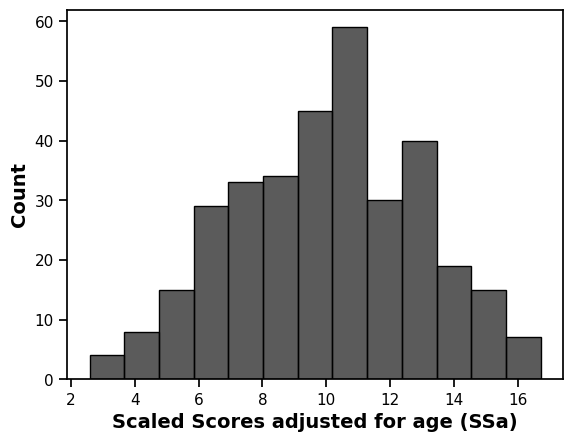

In [74]:
# Normalise total scores (and divided by age group) using Ivnik (1992) method. This requires convert raw scores to percentile. Then, rescale to a normal distribution with mean 10 and sd 3. Results in variable SSa.
data.sort_values("TOTAL /30", inplace=True)
## Convert raw scores to percentile
pcts = data["TOTAL /30"].rank(pct=True).values

## Then, rescale to a normal distribution with mean 10 and sd 3, bounded from 2 to 18.
from scipy.stats import truncnorm
import matplotlib.pyplot as plt


def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


X = get_truncated_normal(mean=10, sd=3, low=2, upp=18)
SSa = X.ppf(pcts)
sns.histplot(SSa)
plt.xlabel("Scaled Scores adjusted for age (SSa)")

In [75]:
## Now for each age group
pcts_age_60_64 = (
    data.query("`Rango de edad` == '60-64'")["TOTAL /30"].rank(pct=True).values
)
pcts_age_65_69 = (
    data.query("`Rango de edad` == '65-69'")["TOTAL /30"].rank(pct=True).values
)
pcts_age_70_74 = (
    data.query("`Rango de edad` == '70-74'")["TOTAL /30"].rank(pct=True).values
)
pcts_age_75_79 = (
    data.query("`Rango de edad` == '75-79'")["TOTAL /30"].rank(pct=True).values
)
pcts_age_80 = (
    data.query("`Rango de edad` == '80+'")["TOTAL /30"].rank(pct=True).values
)

SSa_60_64 = X.ppf(pcts_age_60_64)
SSa_65_69 = X.ppf(pcts_age_65_69)
SSa_70_74 = X.ppf(pcts_age_70_74)
SSa_75_79 = X.ppf(pcts_age_75_79)
SSa_80 = X.ppf(pcts_age_80)

In [76]:
## Generate interpretation tables. See Ojeda et al. 2016
# Table III of Ojeda et al. 2016
Pc_total = pcts.round(2) * 100
SSa_total = np.floor(SSa)
Score_total = data["TOTAL /30"].sort_values().values
score_60_64 = data.query("`Rango de edad` == '60-64'")["TOTAL /30"].values
score_65_69 = data.query("`Rango de edad` == '65-69'")["TOTAL /30"].values
score_70_74 = data.query("`Rango de edad` == '70-74'")["TOTAL /30"].values
score_75_79 = data.query("`Rango de edad` == '75-79'")["TOTAL /30"].values
score_80 = data.query("`Rango de edad` == '80+'")["TOTAL /30"].values

df_step1_total = (
    pd.DataFrame(
        data=np.array([Pc_total, SSa_total, Score_total]).T,
        columns=["Pc", "SSa", "Score"],
    )
    .groupby("SSa")
    .describe()
    .loc(axis="columns")[:, ["min", "max"]]
)
df_step1_60_64 = (
    pd.DataFrame(
        data=np.array([np.floor(SSa_60_64), score_60_64]).T,
        columns=["SSa", "Score_60_64"],
    )
    .groupby("SSa")
    .describe()
    .loc(axis="columns")[:, ["min", "max"]]
)
df_step1_65_69 = (
    pd.DataFrame(
        data=np.array([np.floor(SSa_65_69), score_65_69]).T,
        columns=["SSa", "Score_65_69"],
    )
    .groupby("SSa")
    .describe()
    .loc(axis="columns")[:, ["min", "max"]]
)
df_step1_70_74 = (
    pd.DataFrame(
        data=np.array([np.floor(SSa_70_74), score_70_74]).T,
        columns=["SSa", "Score_70_74"],
    )
    .groupby("SSa")
    .describe()
    .loc(axis="columns")[:, ["min", "max"]]
)
df_step1_75_79 = (
    pd.DataFrame(
        data=np.array([np.floor(SSa_75_79), score_75_79]).T,
        columns=["SSa", "Score_75_79"],
    )
    .groupby("SSa")
    .describe()
    .loc(axis="columns")[:, ["min", "max"]]
)
df_step1_80 = (
    pd.DataFrame(
        data=np.array([np.floor(SSa_80), score_80]).T,
        columns=["SSa", "Score_80"],
    )
    .groupby("SSa")
    .describe()
    .loc(axis="columns")[:, ["min", "max"]]
)

df_step1 = pd.concat(
    [
        df_step1_total,
        df_step1_60_64,
        df_step1_65_69,
        df_step1_70_74,
        df_step1_75_79,
        df_step1_80,
    ],
    axis=1,
)
df_step1

Pc       Score       Score_60_64       Score_65_69       Score_70_74  \
       min   max   min   max         min   max         min   max         min   
SSa                                                                            
2.0    0.0   0.0   3.0   3.0         NaN   NaN         NaN   NaN         NaN   
3.0    1.0   2.0   4.0   6.0         NaN   NaN         9.0   9.0         6.0   
4.0    3.0   3.0   7.0   7.0        10.0  11.0        11.0  11.0         7.0   
5.0    5.0   7.0   8.0   9.0        13.0  13.0        13.0  13.0         8.0   
6.0    9.0  15.0  10.0  12.0        14.0  14.0        14.0  14.0        11.0   
7.0   19.0  24.0  13.0  14.0        15.0  17.0        15.0  15.0        14.0   
8.0   29.0  34.0  15.0  16.0        18.0  20.0        16.0  17.0        16.0   
9.0   40.0  47.0  17.0  18.0        21.0  21.0        18.0  20.0        18.0   
10.0  53.0  59.0  19.0  20.0        22.0  22.0        21.0  22.0        19.0   
11.0  64.0  72.0  21.0  22.0        23.0  23.0        23.0  24.0        21.0   
12.0  80.0  80.0  23.0  23.0        24.0  24.0        25.0  25.0        23.0   
13.0  86.0  89.0  24.0  25.0        25.0  25.0        26.0  26.0        24.0   
14.0  92.0  95.0  26.0  27.0        26.0  27.0        27.0  27.0        26.0   
15.0  97.0  97.0  28.0  28.0        28.0  28.0        28.0  28.0        28.0   
16.0  99.0  99.0  29.0  29.0         NaN   NaN        29.0  29.0         NaN   
18.0   NaN   NaN   NaN   NaN        29.0  29.0         NaN   NaN        29.0   

           Score_75_79       Score_80        
       max         min   max      min   max  
SSa                                          
2.0    NaN         NaN   NaN      NaN   NaN  
3.0    6.0         3.0   3.0      4.0   4.0  
4.0    7.0         NaN   NaN      5.0   5.0  
5.0   10.0         7.0   7.0      6.0   7.0  
6.0   12.0         8.0   8.0      8.0  10.0  
7.0   15.0         9.0  11.0     11.0  12.0  
8.0   17.0        12.0  15.0     13.0  13.0  
9.0   18.0        16.0  18.0     14.0  15.0  
10.0  20.0        19.0  20.0     16.0  17.0  
11.0  22.0        21.0  22.0     18.0  18.0  
12.0  23.0        23.0  23.0     19.0  20.0  
13.0  24.0        24.0  24.0     21.0  22.0  
14.0  27.0        25.0  25.0     23.0  23.0  
15.0  28.0         NaN   NaN     26.0  26.0  
16.0   NaN        29.0  29.0     27.0  27.0  
18.0  29.0         NaN   NaN     28.0  28.0

In [77]:
# Implement Neurocog and Neuronorma regression based norms calculation. This requires to compute the formula: SSAE = SSA - (B x [Education-12]). See Peña-Casanova 2009.

educ_total = data["Anos de estudios"].values

## First, get B required for education adjustments
B_total = pg.linear_regression(X=educ_total, y=SSa)["coef"][1]

## Now calculate SSAE = SSA - (B x [Education-12])
SSAE_total = np.floor(SSa - (B_total * (educ_total - 11)))

In [78]:
pg.linear_regression(X=educ_total, y=SSa).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.076,0.405,14.990,0.0,0.241,0.239,5.278,6.873
1,x1,0.335,0.032,10.343,0.0,0.241,0.239,0.272,0.399


In [79]:
## Generate interpretation tables. See Ojeda et al. 2016
# Table IV of Ojeda et al. 2016
SSa_range = np.arange(2.0, 19.0)
Educ_range = np.arange(0, np.max(educ_total))
SSAE_tab = np.zeros((SSa_range.size, Educ_range.size))

for i in range(SSa_range.size):
    # SSAE_tab[i,:] = np.floor( SSa_range[i] - (B_total * (Educ_range - 12) ) )
    SSAE_tab[i, :] = np.floor(SSa_range[i] - (B_total * (Educ_range - 11)))

df_step2_total = (
    pd.DataFrame(data=np.array([Pc_total, SSa_total]).T, columns=["Pc", "SSa"])
    .groupby("SSa")
    .describe()
    .loc(axis="columns")[:, ["min", "max"]]
)
df_step2_ssae = pd.DataFrame(data=SSAE_tab, index=SSa_range)
df_step2 = pd.concat([df_step2_total, df_step2_ssae], axis=1)
df_step2

,"(Pc, min)","(Pc, max)",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
2.0,0.0,0.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-3.0
3.0,1.0,2.0,6.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-2.0
4.0,3.0,3.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0
5.0,5.0,7.0,8.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0
6.0,9.0,15.0,9.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0
7.0,19.0,24.0,10.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0
8.0,29.0,34.0,11.0,11.0,11.0,10.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0
9.0,40.0,47.0,12.0,12.0,12.0,11.0,11.0,11.0,10.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,5.0,4.0
10.0,53.0,59.0,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,10.0,10.0,10.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0
11.0,64.0,72.0,14.0,14.0,14.0,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,6.0
